In [6]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [7]:

# Step 2: Load Dataset
# =============================
df = pd.read_csv("medical_prescriptions.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())


✅ Dataset loaded successfully!
Shape: (50, 2)
   PrescriptionID                               Drugs
0               1             Paracetamol,Amoxicillin
1               2            Paracetamol,Azithromycin
2               3  Amoxicillin,Metformin,Atorvastatin
3               4   Paracetamol,Amoxicillin,Ibuprofen
4               5            Azithromycin,Paracetamol


In [8]:
# Step 3: Transaction Encoding
# =============================
transactions = df['Drugs'].apply(lambda x: x.split(',')).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("\n✅ Encoded Transactions:")
print(df_encoded.head())



✅ Encoded Transactions:
   Amoxicillin  Atorvastatin  Azithromycin  Ibuprofen  Metformin  Omeprazole  \
0         True         False         False      False      False       False   
1        False         False          True      False      False       False   
2         True          True         False      False       True       False   
3         True         False         False       True      False       False   
4        False         False          True      False      False       False   

   Paracetamol  
0         True  
1         True  
2        False  
3         True  
4         True  


In [9]:
# Step 4: Apply Apriori Algorithm
# =============================
frequent_items = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)

print("\n✅ Frequent Itemsets Found:", len(frequent_items))
print(frequent_items.head(10))



✅ Frequent Itemsets Found: 17
    support                    itemsets
5      0.74               (Paracetamol)
0      0.64               (Amoxicillin)
9      0.42  (Amoxicillin, Paracetamol)
4      0.40                 (Metformin)
14     0.28    (Metformin, Paracetamol)
1      0.24              (Atorvastatin)
3      0.22                 (Ibuprofen)
7      0.20    (Amoxicillin, Ibuprofen)
13     0.18    (Ibuprofen, Paracetamol)
10     0.18   (Metformin, Atorvastatin)


In [10]:
# Step 5: Generate Association Rules
# =============================
if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values(by="lift", ascending=False)
    print("\n✅ Association Rules Generated:", len(rules))
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")


✅ Association Rules Generated: 21
                    antecedents                 consequents  support  \
19  (Atorvastatin, Paracetamol)                 (Metformin)     0.10   
8                (Atorvastatin)                 (Metformin)     0.18   
7                   (Metformin)              (Atorvastatin)     0.18   
12                  (Ibuprofen)  (Amoxicillin, Paracetamol)     0.16   
10   (Amoxicillin, Paracetamol)                 (Ibuprofen)     0.16   
18     (Metformin, Paracetamol)              (Atorvastatin)     0.10   
20               (Atorvastatin)    (Metformin, Paracetamol)     0.10   
5                   (Ibuprofen)               (Amoxicillin)     0.20   
4                 (Amoxicillin)                 (Ibuprofen)     0.20   
11     (Ibuprofen, Paracetamol)               (Amoxicillin)     0.16   

    confidence      lift  
19    0.833333  2.083333  
8     0.750000  1.875000  
7     0.450000  1.875000  
12    0.727273  1.731602  
10    0.380952  1.731602  
18    0.35

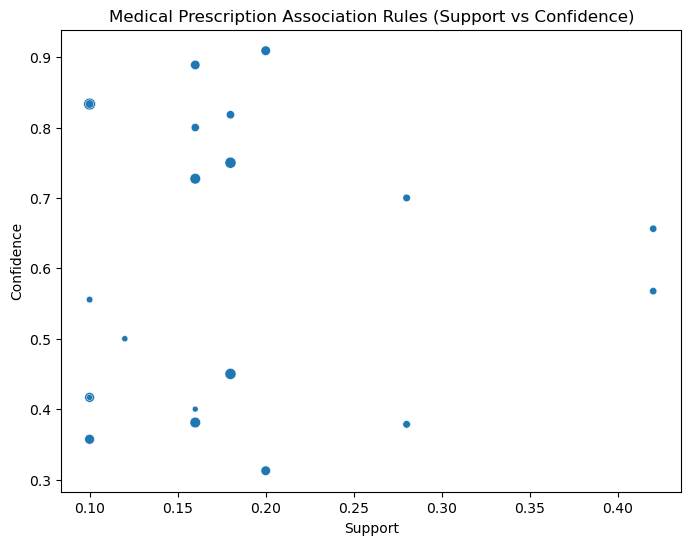

In [11]:
# Step 6: Visualization - Support vs Confidence
# =============================
if not frequent_items.empty and not rules.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False)
    plt.title("Medical Prescription Association Rules (Support vs Confidence)")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("⚠️ No rules to visualize.")

In [12]:
# Step 7: Display Top 5 Rules
# =============================
if not rules.empty:
    print("\n🧠 Top 5 Drug Co-Prescription Rules:")
    for i, row in rules.head(5).iterrows():
        print(f"{set(row['antecedents'])} → {set(row['consequents'])} "
              f"(support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("⚠️ No rules available to display.")


🧠 Top 5 Drug Co-Prescription Rules:
{'Atorvastatin', 'Paracetamol'} → {'Metformin'} (support=0.10, confidence=0.83, lift=2.08)
{'Atorvastatin'} → {'Metformin'} (support=0.18, confidence=0.75, lift=1.88)
{'Metformin'} → {'Atorvastatin'} (support=0.18, confidence=0.45, lift=1.87)
{'Ibuprofen'} → {'Amoxicillin', 'Paracetamol'} (support=0.16, confidence=0.73, lift=1.73)
{'Amoxicillin', 'Paracetamol'} → {'Ibuprofen'} (support=0.16, confidence=0.38, lift=1.73)
